# Desarrollo del Análisis de Rotación de Empleados
La rotación y el abandono voluntario de empleados pueden estar influenciados por múltiples factores.
Vamos a estructurar el análisis en tres fases:
1. Análisis Univariado (Explorar cada variable por separado).
2. Análisis Bivariado (Relacionar variables y encontrar patrones).
3. Visualización Impactante (Gráficos clave para entender el problema).

In [4]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [17]:
df_analisis = pd.read_csv('../Fase2_Nulos/df_filtrado_notnulls.csv')

In [18]:
df_analisis.sample(5)

,employee_turnover,business_travel_frequency,distance_from_home_km,education_level,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,marital_status,num_companies_worked,overtime_hours,percent_salary_hike,standard_work_hours,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,remote_work,total_years_worked,annual_salary,work_life_balance
1071,no,unknown,8.0,4,1.0,female,3,2,1,unknown,2,no,13,full_time,1,6,2,2,1990,no,10.0,63920.00,1.0
702,no,travel_frequently,8.0,1,3.0,male,3,1,3,married,1,no,11,full_time,1,3,8,7,1984,yes,10.0,37550.00,3.0
568,yes,unknown,9.0,3,1.0,male,3,1,1,unknown,7,no,22,none,0,2,5,4,1991,no,10.0,53914.11,4.0
1323,no,travel_rarely,8.0,5,2.0,male,3,2,1,unknown,3,no,14,part_time,1,3,0,0,1989,yes,10.0,51210.00,3.0
187,no,unknown,2.0,2,1.0,female,2,4,4,married,9,no,23,none,1,1,20,8,1978,yes,22.0,53914.11,3.0


In [19]:
df_analisis.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home_km,1614.0,8.667286,7.459181,1.0,2.0,7.00,11.0,29.0
education_level,1614.0,2.925031,1.022357,1.0,2.0,3.00,4.0,5.0
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.00,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.00,3.0,4.0
job_level,1614.0,2.068154,1.101344,1.0,1.0,2.00,3.0,5.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.00,4.0,4.0
num_companies_worked,1614.0,2.673482,2.506152,0.0,1.0,2.00,4.0,9.0
percent_salary_hike,1614.0,15.165428,3.648610,11.0,12.0,14.00,18.0,25.0
stock_option_level,1614.0,0.791202,0.842396,0.0,0.0,1.00,1.0,3.0
training_sessions_last_year,1614.0,2.809789,1.297765,0.0,2.0,3.00,3.0,6.0


### Estableciendo Correlaciones Numéricas

La correlación de Pearson es útil porque mide la relación lineal entre dos variables numéricas. Nos ayuda a responder preguntas como:

    ❇️ ¿Qué factores influyen en el abandono de empleados?
    ❇️ ¿Existe relación entre el salario y la satisfacción laboral?
    ❇️ ¿A mayor distancia del trabajo, hay más rotación?

Nos ayuda a visualizar patrones ocultos: Algunas relaciones no son obvias sin un análisis de correlación. Por ejemplo: Si "work_life_balance" y "employee_turnover" tienen correlación negativa fuerte, mejorar el equilibrio vida-trabajo puede reducir la rotación.

▶️¿Cómo funciona?
La correlación de Pearson devuelve un valor entre -1 y 1:

    🔸 Cerca de +1 → Relación positiva fuerte (Si una variable sube, la otra también)
    🔸 Cerca de -1 → Relación negativa fuerte (Si una sube, la otra baja)
    🔸 Cerca de 0 → No hay relación lineal

In [11]:
df_correlaciones = df_analisis.select_dtypes(include=['number']).corr(method="pearson")
df_correlaciones

,distance_from_home_km,education_level,environmental_satisfaction_level,job_involvement_level,job_level,job_satisfaction_level,num_companies_worked,percent_salary_hike,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,total_years_worked,annual_salary,work_life_balance
distance_from_home_km,1.000000,0.027864,-0.019420,0.020938,0.008120,0.004403,-0.007573,0.057036,0.067375,-0.051308,0.010439,0.013331,0.003625,-0.000816,-0.012235,-0.032258
education_level,0.027864,1.000000,-0.037240,0.043048,0.100346,-0.006928,0.116021,-0.009138,0.012767,-0.039725,0.070010,0.068201,-0.201536,0.125259,0.093245,0.021237
environmental_satisfaction_level,-0.019420,-0.037240,1.000000,-0.007909,0.007135,0.008300,-0.001017,-0.040069,0.008002,-0.048562,0.008301,-0.004162,-0.015337,0.012955,0.009222,0.047702
job_involvement_level,0.020938,0.043048,-0.007909,1.000000,-0.000297,-0.020332,0.026374,-0.004661,0.035480,-0.012010,-0.015409,0.040507,-0.036568,0.022475,-0.017915,-0.013044
job_level,0.008120,0.100346,0.007135,-0.000297,1.000000,-0.015388,0.143060,-0.041995,0.022030,-0.026059,0.532415,0.365260,-0.507748,0.620530,0.882054,0.021209
job_satisfaction_level,0.004403,-0.006928,0.008300,-0.020332,-0.015388,1.000000,-0.054967,0.027774,0.013897,0.003339,-0.006868,-0.034596,0.010725,-0.024691,0.000526,-0.024389
num_companies_worked,-0.007573,0.116021,-0.001017,0.026374,0.143060,-0.054967,1.000000,-0.003378,0.039339,-0.080868,-0.129465,-0.119690,-0.289166,0.210844,0.110463,-0.012054
percent_salary_hike,0.057036,-0.009138,-0.040069,-0.004661,-0.041995,0.027774,-0.003378,1.000000,0.011043,-0.006836,-0.041213,-0.010821,-0.006728,-0.031841,-0.029821,0.001218
stock_option_level,0.067375,0.012767,0.008002,0.035480,0.022030,0.013897,0.039339,0.011043,1.000000,0.007315,0.013781,0.027543,-0.039405,0.050299,0.014915,-0.006032
training_sessions_last_year,-0.051308,-0.039725,-0.048562,-0.012010,-0.026059,0.003339,-0.080868,-0.006836,0.007315,1.000000,0.008089,0.008678,0.031776,-0.063411,-0.025426,0.018330


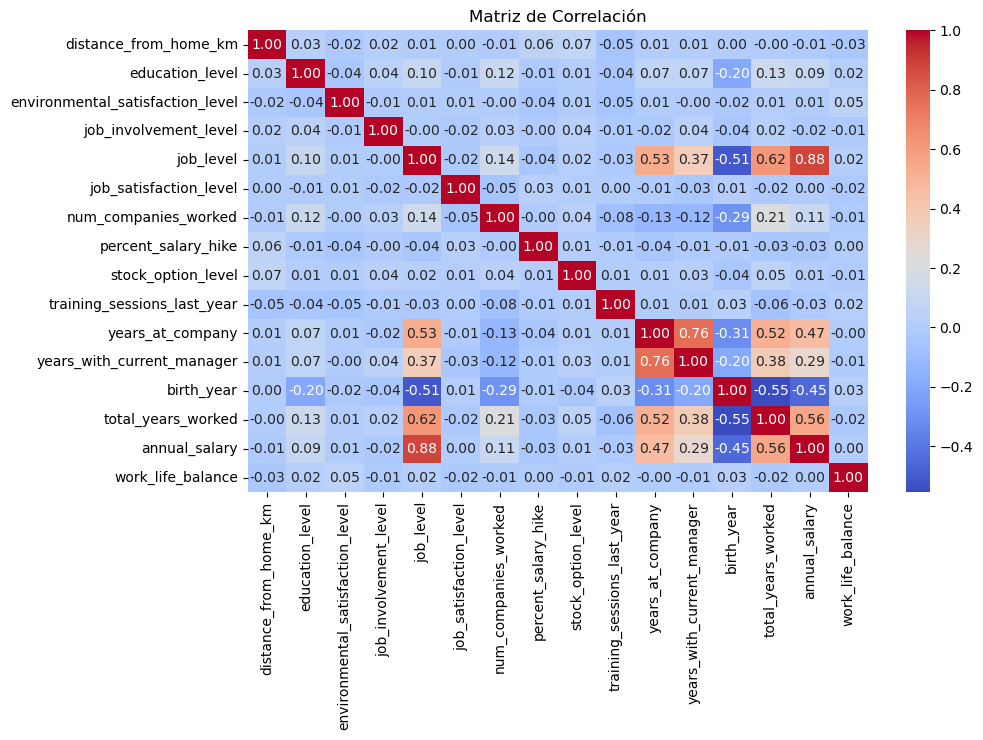

In [12]:
# Graficar un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## Análisis de la Matriz de Correlación

🔻 **Correlaciones más fuertes (+0.5 o más)**

1. "annual_salary" y "job_level"(0.88): Cuanto más alto es el nivel del puesto, mayor es el salario. Tiene lógica pues los ascensos llevan a mejores sueldos.
2. "years_at_company" y "years_with_current_manager" (0.76):  Si un empleado lleva más tiempo en la empresa, también ha estado con su gerente por más tiempo. Indica estabilidad en los equipos de trabajo.
3. "total_years_worked" y "years_at_company" (0.52): Los empleados que han trabajado más años en otras empresas también llevan más tiempo en la empresa actual.
4. "years_at_company" y "job_level" (0.53): Los empleados con más años en la empresa tienden a estar en niveles laborales más altos.

🔻 **Correlaciones negativas fuertes (-0.5 o menos)**

1. "birth_year" está fuertemente correlacionado de manera negativa con total_years_worked (-0.55) y annual_salary (-0.56).** Esto sugiere que cuanto más joven es un empleado, menos años ha trabajado en otras empresas y tienen salarios más bajos. 
2. "job_level" y "birth_year" (-0.51): Los empleados más jóvenes suelen estar en niveles laborales más bajos.

🔻 **Correlaciones moderadas (0.2 a 0.5)**

1. "years_at_company" y "annual_salary" (0.47): Cuanto más tiempo en la empresa, mayor es el salario. La antigüedad es recompensada.
2. "num_companies_worked" tiene una relación positiva con "total_years_worked" (0.21), lo que sugiere que las personas con más experiencia laboral han cambiado más de empresa.
3. "education_level" tiene una correlación algo moderada con "total_years_worked" (0.12), pero una correlación negativa con "birth_year" (-0.20), lo que indica que los empleados mayores pueden haber tenido menos nivel educativo en promedio.

*En Resumen*

*Parece que la empresa no recompensa a los nuevos empleados, podría ser complicado acceder a un puesto alto con sueldo superior sin haber logrado una estabilidad en la empresa. Sería interesante estudiar la información sobre las condiciones laborales de los empleados que llevan menos tiempo en la empresa.*

*En cambio, "environmental_satisfaction_level", "job_satisfaction_level"" y "work_life_balance" tienen correlaciones bajas con otras variables. Esto podría indicar que la satisfacción laboral es más subjetiva y menos dependiente de factores numéricos como el salario o los años trabajados.*

## Medidas de Correlación: Relacionando Columnas

In [28]:
from itertools import combinations
# definimos la lista los nombres de las variables numéricas 
numericas = df_analisis.select_dtypes(include = np.number).columns
# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))
combinaciones

[('distance_from_home_km', 'education_level'),
 ('distance_from_home_km', 'environmental_satisfaction_level'),
 ('distance_from_home_km', 'job_involvement_level'),
 ('distance_from_home_km', 'job_level'),
 ('distance_from_home_km', 'job_satisfaction_level'),
 ('distance_from_home_km', 'num_companies_worked'),
 ('distance_from_home_km', 'percent_salary_hike'),
 ('distance_from_home_km', 'stock_option_level'),
 ('distance_from_home_km', 'training_sessions_last_year'),
 ('distance_from_home_km', 'years_at_company'),
 ('distance_from_home_km', 'years_with_current_manager'),
 ('distance_from_home_km', 'birth_year'),
 ('distance_from_home_km', 'total_years_worked'),
 ('distance_from_home_km', 'annual_salary'),
 ('distance_from_home_km', 'work_life_balance'),
 ('education_level', 'environmental_satisfaction_level'),
 ('education_level', 'job_involvement_level'),
 ('education_level', 'job_level'),
 ('education_level', 'job_satisfaction_level'),
 ('education_level', 'num_companies_worked'),
 ('

## Analizaremos más adelante las variables categóricas ordinales como categorías con un orden lógico numeradas no como variables numéricas discretas:
'job_satisfaction_level', 'stock_option_level', 'work_life_balance', 'job_level', 'environmental_satisfaction_level', 'education_level' y 'job_involvement_level'.

A continuación utilizamos un gráfico de dispersión para identificar relaciones, ver la distribución de puntos en estas variables numéricas y categóricas numéricas.

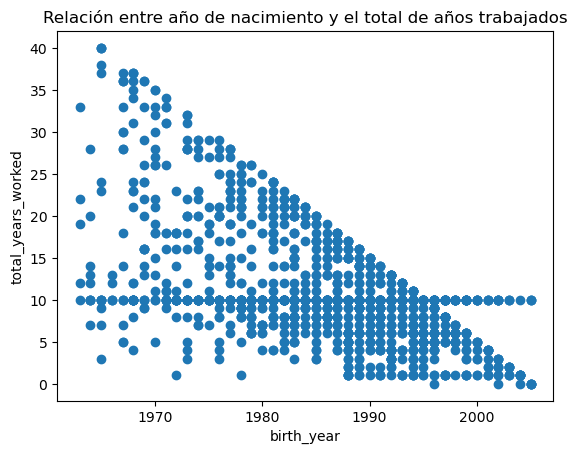

In [40]:
import matplotlib.pyplot as plt
# Crear un gráfico de dispersión para cada una de las combinaciones de variables
plt.scatter(df_analisis['birth_year'], df_analisis['total_years_worked'])
plt.xlabel('birth_year')
plt.ylabel('total_years_worked')
plt.title("Relación entre año de nacimiento y el total de años trabajados")
plt.show()

In [42]:
'''
Esta gráfica muestra la relación negativa fuerte entre el año de nacimiento'
y el total de años trabajados. A medida que el año de nacimiento aumenta (es decir, cuanto más joven es la persona),
el total de años trabajados es menor.
Los trabajadores más antiguos (nacidos antes de 1970) pueden haber trabajado hasta 40 años.
Los nacidos después del 2000 tienen pocos o ningún año trabajado.

Podemos destacar que hay una franja horizontal en el valor de 10 años trabajados. Esto puede deberse a: 
- Políticas de retiro o jubilación.
- Redondeo en los datos.
- Errores en la recolección de datos.'
'''

"\nEsta gráfica muestra la relación negativa fuerte entre el año de nacimiento'\ny el total de años trabajados. A medida que el año de nacimiento aumenta (es decir, cuanto más joven es la persona),\nel total de años trabajados es menor.\nLos trabajadores más antiguos (nacidos antes de 1970) pueden haber trabajado hasta 40 años.\nLos nacidos después del 2000 tienen pocos o ningún año trabajado.\n\nPodemos destacar que hay una franja horizontal en el valor de 10 años trabajados. Esto puede deberse a: \n- Políticas de retiro o jubilación.\n- Redondeo en los datos.\n- Errores en la recolección de datos.'\n"

Text(0.5, 1.0, 'Distribución de los años trabajados en la empresa')

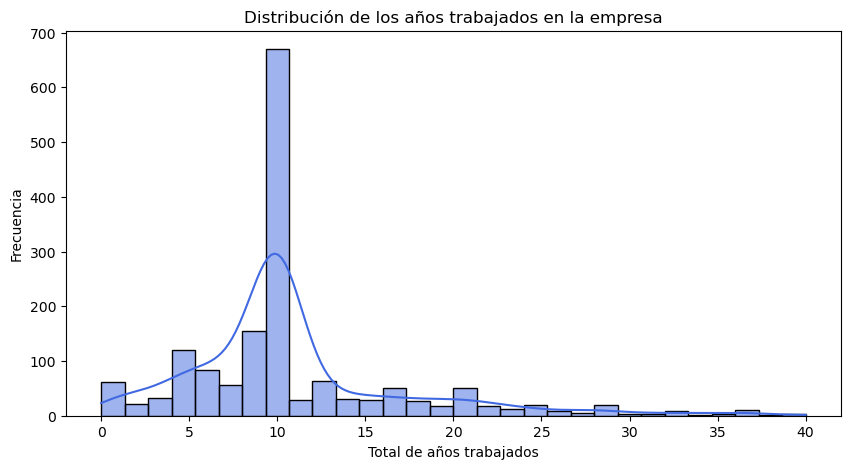

In [44]:
# Para comprobar que no hay redondeo ni errores en los datos, vamos a ver la distribución de los años trabajados
# Verificar la distribución de los años trabajados
# Crear un histograma para ver la distribución de los años trabajados
plt.figure(figsize=(10, 5))
sns.histplot(df_analisis["total_years_worked"], bins=30, kde=True, color="royalblue")
# Etiquetas y título
plt.xlabel("Total de años trabajados")
plt.ylabel("Frecuencia")
plt.title("Distribución de los años trabajados en la empresa")

In [45]:
df_analisis["total_years_worked"].value_counts().head(10)


total_years_worked
10.0    670
8.0      86
6.0      84
9.0      69
5.0      66
7.0      56
4.0      54
1.0      53
12.0     34
3.0      32
Name: count, dtype: int64

In [ ]:
'''Hay una frecuencia destacada en 10 años. Esto puede deberse a políticas de la empresa (por ejemplo, revisiones de carrera cada 10 años)'
o simplemente una tendencia natural en los empleados.
'''

**Tras saber esto, vamos a analizar la edad y retención: ¿Hay un punto en el que los empleados parecen abandonar la empresa?**
- Relacionamos una variable numérica discreta y una categórica nominal:

In [ ]:
## CORREGIR CON EL CÓDIGO DE ISA# Filtrar las correlaciones en los rangos deseados
df_filtrado = df_correlaciones[
    ((df_correlaciones >= 0.5) & (df_correlaciones <= 1)) | 
    ((df_correlaciones <= -0.5) & (df_correlaciones >= -1))
]

# Ver el DataFrame filtrado
display(df_filtrado)

,distance_from_home_km,education_level,environmental_satisfaction_level,job_involvement_level,job_level,job_satisfaction_level,num_companies_worked,percent_salary_hike,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,total_years_worked,annual_salary,work_life_balance
distance_from_home_km,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environmental_satisfaction_level,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_involvement_level,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_level,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.532415,NaN,-0.507748,0.620530,0.882054,NaN
job_satisfaction_level,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_companies_worked,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percent_salary_hike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stock_option_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
training_sessions_last_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


## **¿Qué variables son más útiles para entender la rotación?**

- Si "work_life_balance" tuviera una correlación negativa con "employee_turnover", significaría que el equilibrio vida-trabajo influye en la rotación.
- Si "distance_from_home_km" tuviera una correlación positiva con la rotación, los empleados que viven más lejos podrían estar dejando la empresa.

## **Estrategia para comprobar posibles hipótesis:**

🔸 Revisar si los empleados jóvenes con bajo salario y bajo nivel de puesto son los que más renuncian.
🔸Investigar si los empleados con pocos años con su gerente tienen más rotación.

🔸Analizar si los empleados que viajan con frecuencia (business_travel_frequency) están más insatisfechos.

### Estableciendo Relaciones entre Variables Categóricas y Numéricas
Realizamos gráficos de barras (contplots) para interpretar los datos.

In [46]:
df_categ = df_analisis.select_dtypes(include = 'object')

In [47]:
df_categ.describe().T

,count,unique,top,freq
employee_turnover,1614,2,no,1355
business_travel_frequency,1614,4,unknown,772
gender,1614,2,female,971
marital_status,1614,4,unknown,651
overtime_hours,1614,3,no,682
standard_work_hours,1614,3,part_time,888
remote_work,1614,2,yes,1000


- Analizamos la relación entre la distancia trabajo-hogar con la rotación de empleados:

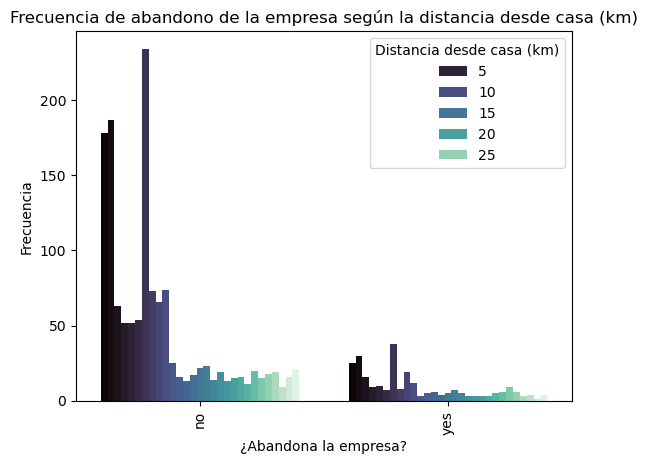

In [60]:
sns.countplot(x="employee_turnover", 
              data=df_analisis, 
              palette="mako", 
              hue="distance_from_home_km")
              
 # añadir nombre a hue 
plt.legend(title="Distancia desde casa (km)", loc='upper right')
# giramos las etiquetas del eje "x",  
plt.xticks(rotation=90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("¿Abandona la empresa?")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de abandono de la empresa según la distancia desde casa (km)")
plt.show()

## FALTA MODIFICAR DESDE AQUI NOELIA: CONCLUSIONES

## Análisis de las Variables Categóricas

    Rotación de empleados (employee_turnover)

        Hay 1614 empleados en total.

        1355 empleados no han renunciado ("no"), mientras que 259 sí lo han hecho.

        Esto sugiere un desbalance en los datos, lo que podría afectar modelos predictivos (sería importante considerar técnicas como oversampling o undersampling).

    Frecuencia de viajes (business_travel_frequency)

        La categoría más frecuente es "unknown" (772 casos).

        Es preocupante que haya muchos valores desconocidos, lo que podría afectar el análisis.

        Podría valer la pena investigar si los valores "unknown" pueden ser imputados o descartados.

    Género (gender)

        Predominan los hombres (971 casos) frente a las mujeres (643 casos).

        Podría analizarse si hay diferencias en rotación por género.

    Estado civil (marital_status)

        Hay muchos valores "unknown" (651 casos), lo que nuevamente sugiere problemas con la calidad de los datos.

        Si esta variable fuera relevante, podríamos considerar estrategias de imputación.

    Horas extra (overtime_hours)

        La mayoría de empleados no hacen horas extra (682 casos).

        Puede ser interesante ver si hay relación entre hacer horas extra y la rotación.

    Tipo de jornada (standard_work_hours)

        888 empleados trabajan a tiempo parcial.

        Esto puede ser un factor relevante para analizar la rotación.

    Trabajo remoto (remote_work)

        1000 empleados trabajan en remoto (lo cual es la mayoría).

        Podríamos analizar si el trabajo remoto reduce la rotación.

### Género (gender) vs. Rotación

    ¿Hay diferencias en la rotación entre hombres y mujeres?

Trabajo Remoto (remote_work) vs. Rotación

    ¿Los empleados remotos tienen menor rotación que los presenciales?

Horas Extra (overtime_hours) vs. Rotación

    ¿Los empleados que hacen horas extra tienen más probabilidades de renunciar?

Frecuencia de Viajes (business_travel_frequency) vs. Rotación

    ¿Viajar más está relacionado con mayor rotación?

Estado Civil (marital_status) vs. Rotación

    ¿El estado civil influye en la permanencia en la empresa?

## ROTACIÓN DE EMPLEADOS SEGÚN SU GÉNERO

<Axes: xlabel='employee_turnover', ylabel='count'>

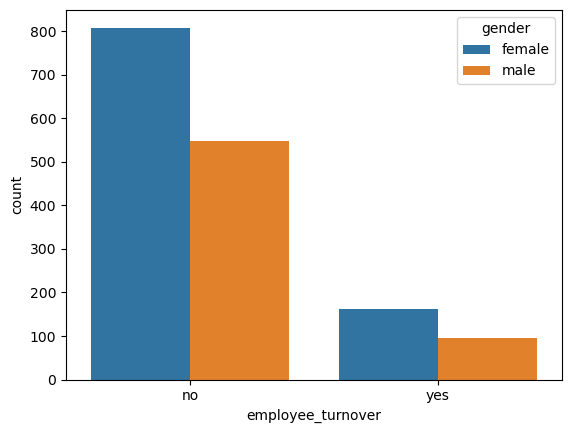

In [39]:
sns.countplot(x='employee_turnover',hue = 'gender',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS SEGÚN SU FRECUENCIA DE VIAJES

<Axes: xlabel='employee_turnover', ylabel='count'>

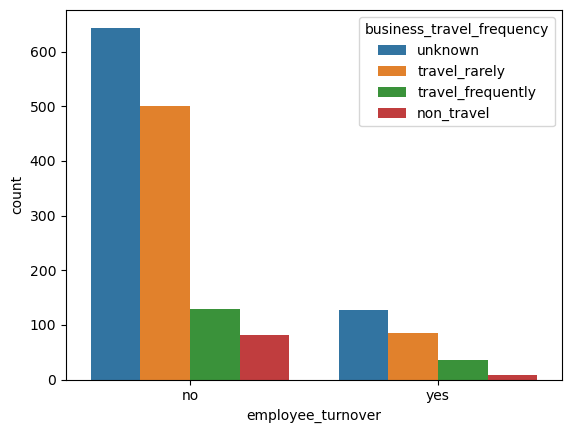

In [40]:
sns.countplot(x='employee_turnover',hue = 'business_travel_frequency',data=df_categ)

#### COMENTAR GRÁFICA

### ROTACIÓN DE EMPLEADOS SEGÚN SU ESTADO CIVIL

<Axes: xlabel='employee_turnover', ylabel='count'>

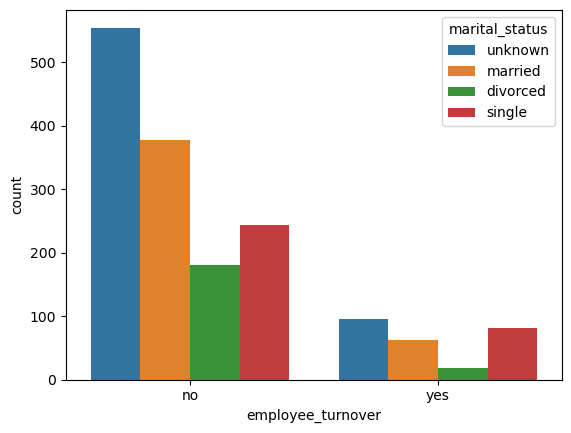

In [41]:
sns.countplot(x='employee_turnover',hue = 'marital_status',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS SEGÚN LAS HORAS EXTRAS

<Axes: xlabel='employee_turnover', ylabel='count'>

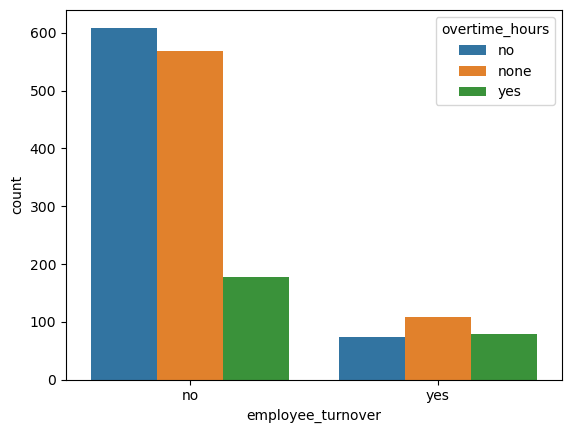

In [42]:
sns.countplot(x='employee_turnover',hue = 'overtime_hours',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS EN FUNCIÓN DE LA JORNADA LABORAL

<Axes: xlabel='employee_turnover', ylabel='count'>

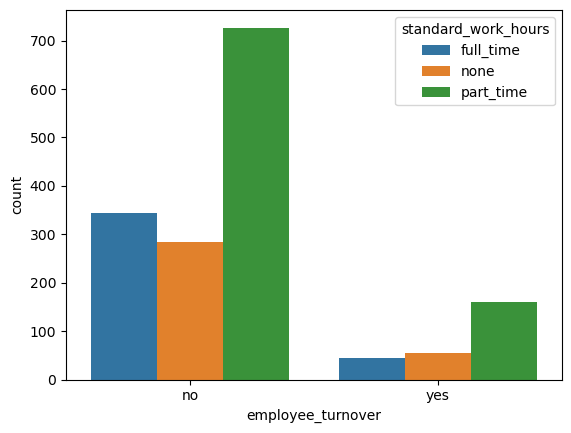

In [43]:
sns.countplot(x='employee_turnover',hue = 'standard_work_hours',data=df_categ)

### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS EN FUNCIÓN DE TELE_TRABAJO

<Axes: xlabel='employee_turnover', ylabel='count'>

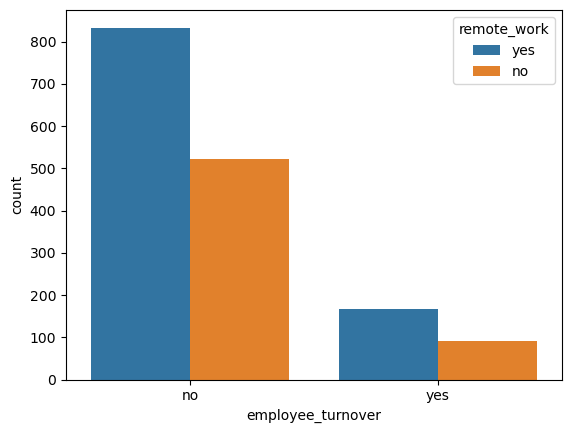

In [44]:
sns.countplot(x='employee_turnover',hue = 'remote_work',data=df_categ)

### COMENTAR GRÁFICA

🔍 Observaciones de los Gráficos

    Género vs. Rotación

        Parece que hombres y mujeres tienen niveles de rotación similares, aunque hay más hombres en la muestra.

    Trabajo Remoto vs. Rotación

        La mayoría de los empleados trabajan en remoto, y la rotación no parece variar mucho entre los grupos.

    Horas Extra vs. Rotación

        Hay más empleados que no hacen horas extra, pero los que sí hacen parecen tener una rotación mayor.

        Esto sugiere que las horas extra podrían estar relacionadas con el desgaste y la rotación.

    Frecuencia de Viajes vs. Rotación

        Hay muchos valores "unknown", lo cual dificulta el análisis.

        Los empleados que viajan con más frecuencia parecen tener mayor rotación que los que no viajan.

    Estado Civil vs. Rotación

        Hay muchos valores "unknown".

        Parece que los empleados solteros tienen más rotación que los casados/divorciados.

### MEDICIONES COLUMNAS DE SATISFACCIÓN

In [45]:
df_analisis.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [46]:
df_satisf = df_analisis[['environmental_satisfaction_level', 'job_involvement_level','job_satisfaction_level', 'work_life_balance']]

In [47]:
df_satisf.describe().T

,count,mean,std,min,25%,50%,75%,max
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.0,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.0,3.0,4.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.0,4.0,4.0
work_life_balance,1614.0,2.775713,0.681347,1.0,2.0,3.0,3.0,4.0


## COMENTAR NOE

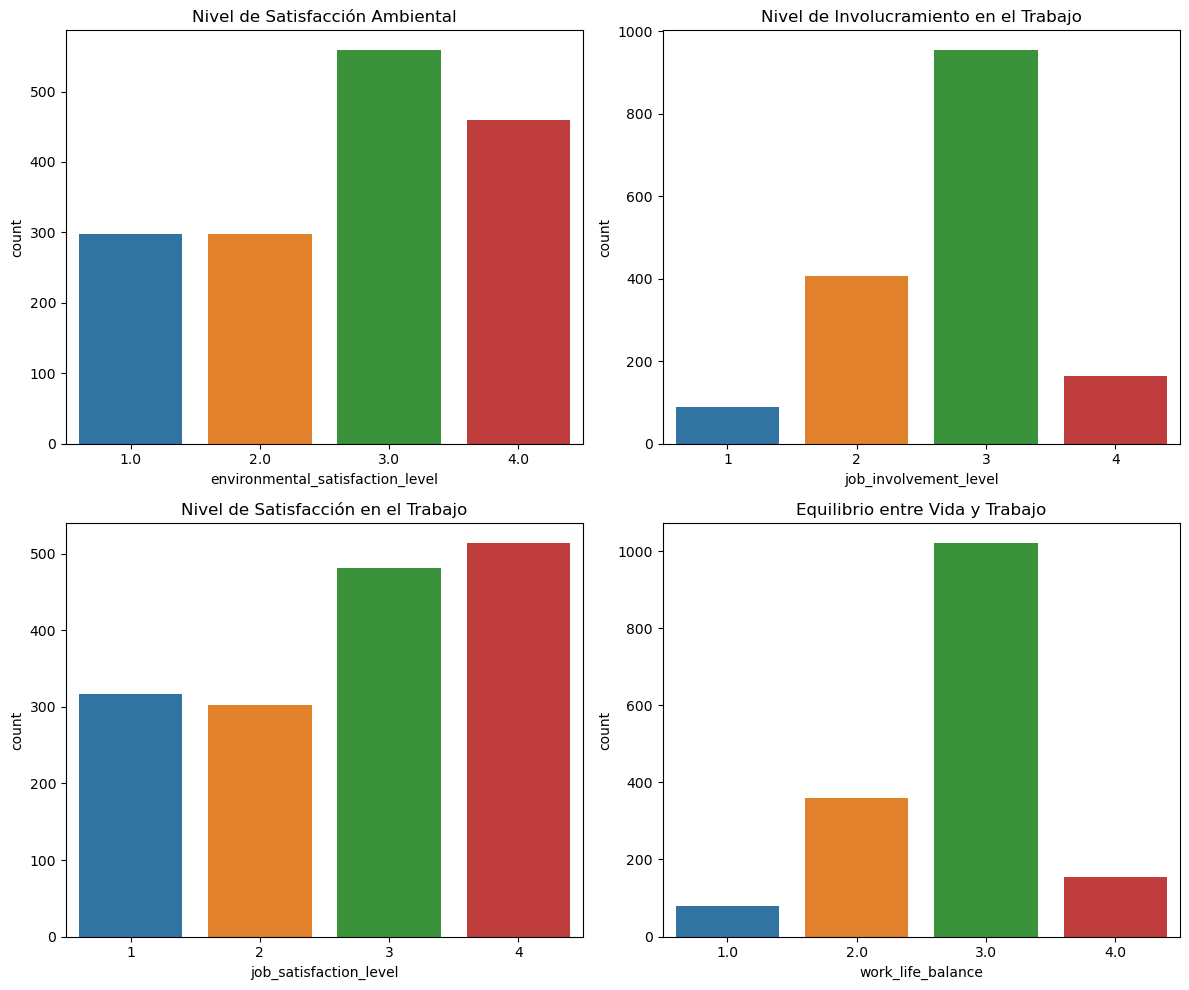

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subgráficos para cada columna de satisfacción
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas

# Graficar cada columna en un subgráfico
sns.countplot(data=df_analisis, x='environmental_satisfaction_level', ax=axes[0, 0])
axes[0, 0].set_title('Nivel de Satisfacción Ambiental')

sns.countplot(data=df_analisis, x='job_involvement_level', ax=axes[0, 1])
axes[0, 1].set_title('Nivel de Involucramiento en el Trabajo')

sns.countplot(data=df_analisis, x='job_satisfaction_level', ax=axes[1, 0])
axes[1, 0].set_title('Nivel de Satisfacción en el Trabajo')

sns.countplot(data=df_analisis, x='work_life_balance', ax=axes[1, 1])
axes[1, 1].set_title('Equilibrio entre Vida y Trabajo')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

#### COMENTAR GRÁFICAS NOE

### ANÁLISIS DE LOS NIVELES DE SATISFACCIÓN CON RESPECTO AL ABANDONO DE LOS EMPLEADOS

In [49]:
df_analisis.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

### REALIZAR CROSSTAP DE LAS COLUMNAS DE SATISFACCIÓN PATRI